In [3]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [4]:
%pwd

'd:\\Professional\\Research\\works\\Bangla_Research\\research'

In [5]:
df = pd.read_json("D:/Professional/Research/works/Bangla_Research/data/data_v2.json")

In [6]:
len(df)

408471

In [7]:
df.head()

,author,category,category_bn,published_date,modification_date,tag,comment_count,title,url,content
0,গাজীপুর প্রতিনিধি,bangladesh,বাংলাদেশ,"০৪ জুলাই ২০১৩, ২৩:২৬","০৪ জুলাই ২০১৩, ২৩:২৭",[গাজীপুর],0,"কালিয়াকৈরে টিফিন খেয়ে ৫০০ শ্রমিক অসুস্থ, বিক...",http://www.prothom-alo.com/bangladesh/article/...,গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায়...
1,অনলাইন ডেস্ক,sports,খেলা,"০৪ জুলাই ২০১৩, ২৩:০৯","০৪ জুলাই ২০১৩, ২৩:১১",[টেনিস],0,সেমিফাইনাল বাধাও পেরিয়ে গেলেন লিসিকি,http://www.prothom-alo.com/sports/article/19028,এবারের উইম্বলডনটা স্মরণীয় করে রাখার মিশনেই যে...
2,নিজস্ব প্রতিবেদক,bangladesh,বাংলাদেশ,"০৪ জুলাই ২০১৩, ২২:২৫","০৪ জুলাই ২০১৩, ২৩:১২",[রাজনীতি],0,সংসদে খালেদার অভিযোগের জবাব দিয়েছে ভারত,http://www.prothom-alo.com/bangladesh/article/...,জাতীয় সংসদে বিএনপি চেয়ারপারসন ও বিরোধীদলীয় ...
3,অনলাইন ডেস্ক,technology,বিজ্ঞান ও প্রযুক্তি,"০৪ জুলাই ২০১৩, ২১:৩৭","০৪ জুলাই ২০১৩, ২১:৪৫",[গবেষণা],0,পাসওয়ার্ড ভুলে যান!,http://www.prothom-alo.com/technology/article/...,সহজ পাসওয়ার্ডের কারণে অনলাইন অ্যাকাউন্ট সহজেই...
4,অনলাইন ডেস্ক,technology,বিজ্ঞান ও প্রযুক্তি,"০৪ জুলাই ২০১৩, ২১:৩৫","০৪ জুলাই ২০১৩, ২১:৩৭",[কম্পিউটার],0,চলে গেলেন মাউস উদ্ভাবক,http://www.prothom-alo.com/technology/article/...,কম্পিউটার মাউসের উদ্ভাবক ডগলাস অ্যাঙ্গেলবার্ট ...


In [8]:
df.sample(5)

,author,category,category_bn,published_date,modification_date,tag,comment_count,title,url,content
131371,-1,technology,বিজ্ঞান ও প্রযুক্তি,"১৪ এপ্রিল ২০১৫, ০০:৫২","১৪ এপ্রিল ২০১৫, ০০:৫৩",[বিজ্ঞান-প্রযুক্তি],0,বিআইজেএফ নির্বাচনে ৯ পদে ১৬ প্রার্থী,http://www.prothom-alo.com/technology/article/...,তথ্যপ্রযুক্তি সাংবাদিকদের সংগঠন বাংলাদেশ আইসিট...
168829,-1,bangladesh,বাংলাদেশ,"১৪ সেপ্টেম্বর ২০১৫, ০১:৫২","১৪ সেপ্টেম্বর ২০১৫, ০১:৫৩",-1,0,প্রকাশিত সংবাদের প্রতিবাদ ও প্রতিবেদকের বক্তব্য,http://www.prothom-alo.com/bangladesh/article/...,গত ৪ সেপ্টেম্বর প্রথম আলোর প্রথম পাতায় প্রকাশ...
59726,প্রথম আলো ডেস্ক,bangladesh,বাংলাদেশ,"২০ মার্চ ২০১৪, ০১:০৩","২০ মার্চ ২০১৪, ০১:০৫","[জাহাঙ্গীরনগর বিশ্ববিদ্যালয়, রাজধানী (জাতীয়)]",0,রাষ্ট্রপতির সঙ্গে জাহাঙ্গীরনগর বিশ্ববিদ্যালয়ের...,http://www.prothom-alo.com/bangladesh/article/...,জাহাঙ্গীরনগর বিশ্ববিদ্যালয়ের নবনিযুক্ত উপাচার্...
291182,"নিজস্ব প্রতিবেদক, চট্টগ্রাম",bangladesh,বাংলাদেশ,"০৭ ফেব্রুয়ারি ২০১৭, ০১:৫০","০৭ ফেব্রুয়ারি ২০১৭, ০১:৫১","[চট্টগ্রাম, চট্টগ্রাম বিভাগ, বিশাল বাংলা, আইন ...",১,নিহতের স্ত্রীর করা লিখিত অভিযোগ এজাহার হিসেবে...,http://www.prothom-alo.com/bangladesh/article/...,চট্টগ্রামের বাঁশখালীতে বিদ্যুৎকেন্দ্র নিয়ে ডাক...
195977,অরুণ কর্মকার,bangladesh,বাংলাদেশ,"২৭ জানুয়ারি ২০১৬, ০১:৫৭","২৭ জানুয়ারি ২০১৬, ০১:৫৮",-1,১,রামপাল বিদ্যুৎকেন্দ্র নির্মাণের চুক্তি হবে ফেব...,http://www.prothom-alo.com/bangladesh/article/...,বহুল আলোচিত রামপাল কয়লাভিত্তিক বিদ্যুৎকেন্দ্র...


In [9]:
len(df["author"].value_counts())

14706

In [10]:
df["author"].value_counts()[:10]

author
-1                             62609
নিজস্ব প্রতিবেদক               52322
অনলাইন ডেস্ক                   32742
নিজস্ব প্রতিবেদক, চট্টগ্রাম    10222
নিজস্ব প্রতিবেদক, ঢাকা          8962
ক্রীড়া প্রতিবেদক                8288
খেলা ডেস্ক                      7149
বিনোদন ডেস্ক                    5479
বিনোদন প্রতিবেদক                4928
ক্রীড়া প্রতিবেদক               4020
Name: count, dtype: int64

In [11]:
df["category"].value_counts()

category
bangladesh       232504
sports            49012
international     30856
entertainment     30466
economy           17245
opinion           15699
technology        12116
life-style        10852
education          9721
Name: count, dtype: int64

In [12]:
df_new = df[['content','category']]

In [13]:
df_new.isnull().sum()

content     0
category    0
dtype: int64

In [14]:
df_new.duplicated().sum()

1567

In [15]:
df_new.drop_duplicates(inplace=True)

C:\Users\koush\AppData\Local\Temp\ipykernel_20168\3069802320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop_duplicates(inplace=True)


In [16]:
df_new.shape

(406904, 2)

In [17]:
categories = df_new["category"].value_counts().reset_index()
categories.columns = ['Category', 'Count']
colors = px.colors.qualitative.Set3[:len(categories)]

fig = px.bar(categories, x='Category', y='Count', color='Category', color_discrete_sequence=colors,
             labels={'Count': 'Count', 'Category': 'Category'},
             title='Category Distribution')
fig.update_xaxes(tickangle=45, tickmode='array', tickvals=list(categories['Category']))
fig.show()


In [18]:
categories = df_new["category"]
lav_cat = LabelEncoder()
num_lav = lav_cat.fit_transform(categories)
df_new['category'] = num_lav

C:\Users\koush\AppData\Local\Temp\ipykernel_20168\3572084676.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
X = df_new['content']
y = df_new['category']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## text representation

In [21]:
# use tf-df
tfidf_vector = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vector.fit_transform(X_train)
X_test_tfidf = tfidf_vector.transform(X_test)

## classifier 

In [22]:
base_classifier = MultinomialNB()

## check common techniques to address class imbalance
#### (1) Evaluate the base classifier without any balancing

In [23]:
base_classifier.fit(X_train_tfidf, y_train)
y_pred_base = base_classifier.predict(X_test_tfidf)
print("Base Classifier (No Balancing):")
print(classification_report(y_test, y_pred_base))

Base Classifier (No Balancing):
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     46428
           1       0.77      0.52      0.62      3455
           2       0.96      0.52      0.68      1896
           3       0.85      0.82      0.83      5967
           4       0.81      0.63      0.71      6163
           5       0.86      0.61      0.71      2211
           6       0.75      0.43      0.55      3153
           7       0.96      0.92      0.94      9699
           8       0.82      0.70      0.75      2409

    accuracy                           0.86     81381
   macro avg       0.85      0.68      0.74     81381
weighted avg       0.86      0.86      0.85     81381



### (3) BalancedBagging Classifier

In [27]:
from imblearn.ensemble import BalancedBaggingClassifier

In [28]:
# Ensemble Methods (BalancedBaggingClassifier)
ensemble_classifier = BalancedBaggingClassifier(base_classifier, random_state=42)
ensemble_classifier.fit(X_train_tfidf, y_train)
y_pred_ensemble = ensemble_classifier.predict(X_test_tfidf)
print("\nEnsemble Classifier (BalancedBaggingClassifier):")
print(classification_report(y_test, y_pred_ensemble))


Ensemble Classifier (BalancedBaggingClassifier):
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     46428
           1       0.47      0.84      0.61      3455
           2       0.89      0.66      0.76      1896
           3       0.78      0.90      0.84      5967
           4       0.74      0.85      0.79      6163
           5       0.59      0.78      0.67      2211
           6       0.38      0.82      0.52      3153
           7       0.98      0.92      0.95      9699
           8       0.64      0.84      0.73      2409

    accuracy                           0.83     81381
   macro avg       0.72      0.82      0.75     81381
weighted avg       0.88      0.83      0.84     81381



### Undersampling

In [29]:
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resampled_under, y_resampled_under = undersampler.fit_resample(X_train_tfidf, y_train)
classifier_under = MultinomialNB()
classifier_under.fit(X_resampled_under, y_resampled_under)
y_pred_under = classifier_under.predict(X_test_tfidf)
print("\nClassifier with Undersampling:")
print(classification_report(y_test, y_pred_under))


Classifier with Undersampling:
              precision    recall  f1-score   support

           0       0.99      0.68      0.80     46428
           1       0.40      0.86      0.54      3455
           2       0.92      0.62      0.74      1896
           3       0.67      0.93      0.78      5967
           4       0.50      0.92      0.64      6163
           5       0.72      0.67      0.70      2211
           6       0.36      0.76      0.49      3153
           7       0.92      0.96      0.94      9699
           8       0.73      0.77      0.75      2409

    accuracy                           0.76     81381
   macro avg       0.69      0.80      0.71     81381
weighted avg       0.86      0.76      0.78     81381



### Oversampling

In [30]:
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled_over, y_resampled_over = oversampler.fit_resample(X_train_tfidf, y_train)
classifier_over = MultinomialNB()
classifier_over.fit(X_resampled_over, y_resampled_over)
y_pred_over = classifier_over.predict(X_test_tfidf)
print("\nClassifier with Oversampling:")
print(classification_report(y_test, y_pred_over))


Classifier with Oversampling:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     46428
           1       0.78      0.51      0.62      3455
           2       0.68      0.82      0.75      1896
           3       0.85      0.82      0.83      5967
           4       0.81      0.63      0.71      6163
           5       0.87      0.59      0.70      2211
           6       0.78      0.42      0.55      3153
           7       0.96      0.92      0.94      9699
           8       0.84      0.67      0.74      2409

    accuracy                           0.86     81381
   macro avg       0.83      0.70      0.75     81381
weighted avg       0.86      0.86      0.85     81381



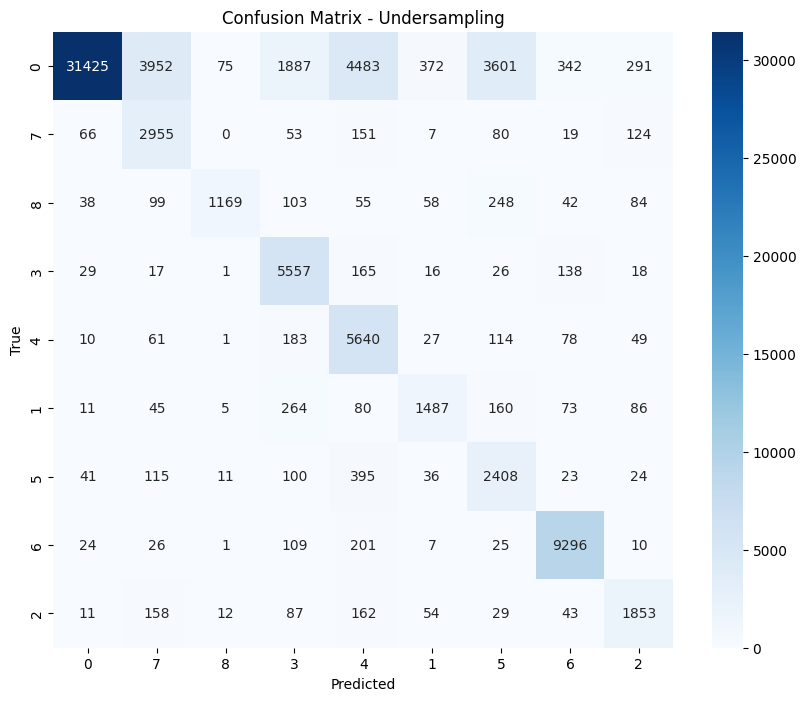

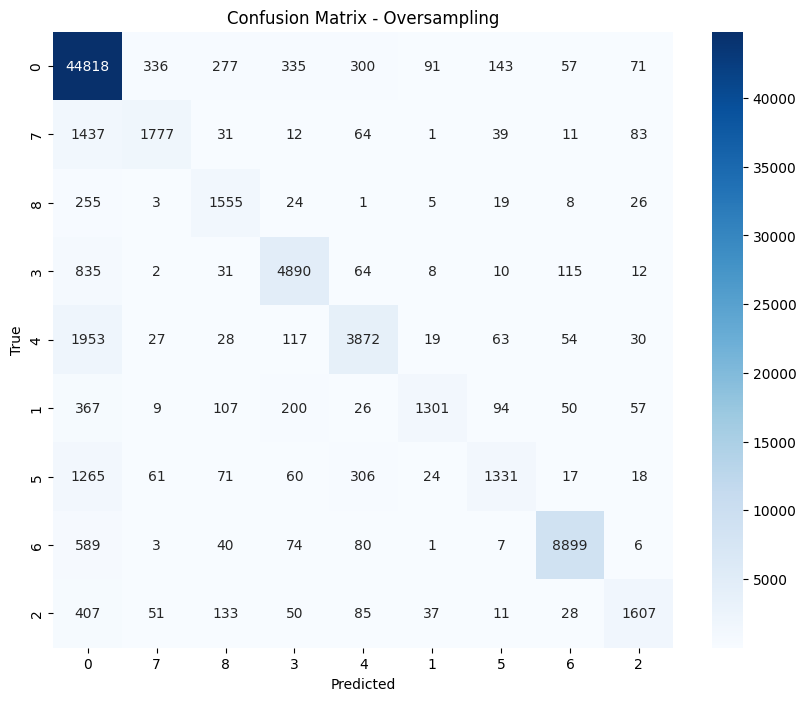

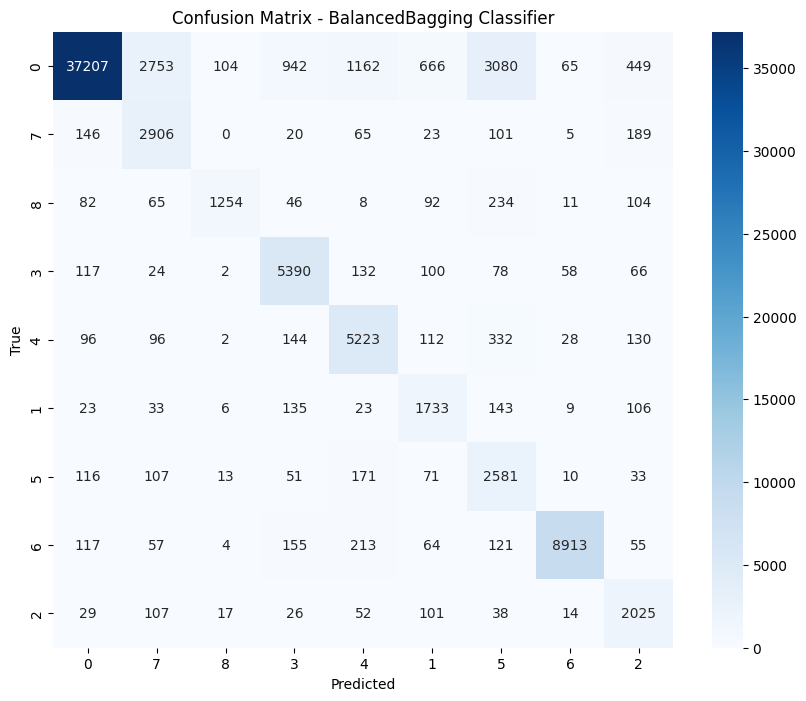

In [35]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    labels = df_new['category'].unique()

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrix for undersampling
plot_confusion_matrix(y_test, y_pred_under, 'Confusion Matrix - Undersampling')

# Plot confusion matrix for oversampling
plot_confusion_matrix(y_test, y_pred_over, 'Confusion Matrix - Oversampling')

# Plot confusion matrix for BalancedBagging Classifier
plot_confusion_matrix(y_test, y_pred_ensemble, 'Confusion Matrix - BalancedBagging Classifier')
